<a href="https://colab.research.google.com/github/Rolweezy/Telco-Customer-Churn-Detection-and-Prevention-Project/blob/main/Telco_Customer_Churn_Prediction_And_Prevention(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Data Manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocessing and Testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.mstats import winsorize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


#Saving the trained model
import joblib

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns" , None) #Show all columns of the data when explored

In [3]:
df=pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We add another column; LongTermCustomers to show customers who have stayed for more than 15 months.

In [7]:
df["LongTermCustomers"] = df["tenure"].apply(lambda x: "Yes" if x > 15 else "No")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,LongTermCustomers
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   SeniorCitizen      7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   PhoneService       7043 non-null   object 
 7   MultipleLines      7043 non-null   object 
 8   InternetService    7043 non-null   object 
 9   OnlineSecurity     7043 non-null   object 
 10  OnlineBackup       7043 non-null   object 
 11  DeviceProtection   7043 non-null   object 
 12  TechSupport        7043 non-null   object 
 13  StreamingTV        7043 non-null   object 
 14  StreamingMovies    7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  PaperlessBilling   7043 

We need to;
1. change the TotalCharges datatype to numeric
2. Drop the CustomerID column


We drop the CustomerID column because it will not be necessary in the data analysis

In [9]:
df=df.drop("customerID" , axis=1)

In [10]:
df[df["tenure"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,LongTermCustomers
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,No


Customers with service duration less than a month had blank 'TotalCharges' column. We’ll replace them with 0 then change the datatype to numeric.

In [11]:
df['TotalCharges']= df['TotalCharges'].replace(" " , 0)
df['TotalCharges']= pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

From the dataset information, there are no null values recorded.

In [12]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The SeniorCitizen column is encoded as:

    0 for non-senior customers
    1 for senior customers

For better readability during analysis and visualization, we’ll convert these to categorical values:

    0 → No
    1 → Yes


In [14]:
def conv(value):
 if value == 1:
  return "Yes"
 else:
  return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   SeniorCitizen      7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   PhoneService       7043 non-null   object 
 6   MultipleLines      7043 non-null   object 
 7   InternetService    7043 non-null   object 
 8   OnlineSecurity     7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  DeviceProtection   7043 non-null   object 
 11  TechSupport        7043 non-null   object 
 12  StreamingTV        7043 non-null   object 
 13  StreamingMovies    7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  PaperlessBilling   7043 non-null   object 
 16  PaymentMethod      7043 

We want to check the data of the customers whose tenure value was 0

In [16]:
df[df["tenure"]==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Only 11 customers had a tenure of 0, implying that they are new customers. Since there are only a few of them, we can do away with them.

In [17]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [18]:
df[["tenure","MonthlyCharges","TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [19]:
df["LongTermCustomers"].value_counts()

,count
LongTermCustomers,
Yes,4573
No,2459


In [20]:
df[["LongTermCustomers","Churn"]].value_counts().unstack()

Churn,No,Yes
LongTermCustomers,,
No,1323,1136
Yes,3840,733


Generally, long term customers tend to churn less as compared to short term customers

In [21]:
df[["PhoneService","MultipleLines"]].value_counts()

PhoneService  MultipleLines   
Yes           No                  3385
              Yes                 2967
No            No phone service     680
Name: count, dtype: int64

In [22]:
df[["PhoneService","InternetService"]].value_counts()

PhoneService  InternetService
Yes           Fiber optic        3096
              DSL                1736
              No                 1520
No            DSL                 680
Name: count, dtype: int64

In [23]:
df[["PhoneService","OnlineSecurity"]].value_counts()
#

PhoneService  OnlineSecurity     
Yes           No                     3098
              Yes                    1734
              No internet service    1520
No            No                      399
              Yes                     281
Name: count, dtype: int64

In [24]:
df[["PhoneService","OnlineBackup"]].value_counts()

PhoneService  OnlineBackup       
Yes           No                     2693
              Yes                    2139
              No internet service    1520
No            No                      394
              Yes                     286
Name: count, dtype: int64

In [25]:
df[["PhoneService","DeviceProtection"]].value_counts()

PhoneService  DeviceProtection   
Yes           No                     2717
              Yes                    2115
              No internet service    1520
No            No                      377
              Yes                     303
Name: count, dtype: int64

In [26]:
df[["PhoneService","MultipleLines"]].value_counts()

PhoneService  MultipleLines   
Yes           No                  3385
              Yes                 2967
No            No phone service     680
Name: count, dtype: int64

In [27]:
df[["PhoneService","Churn"]].value_counts()

PhoneService  Churn
Yes           No       4653
              Yes      1699
No            No        510
              Yes       170
Name: count, dtype: int64

In [28]:
churn_rate_phone_service = (df[(df['PhoneService'] == 'Yes') & (df['Churn'] == 'Yes')].shape[0] / df[df['PhoneService'] == 'Yes'].shape[0]) * 100
print(churn_rate_phone_service)

26.747481108312343


In [29]:
churn_rate_no_phone_service = (df[(df['PhoneService'] == 'No') & (df['Churn'] == 'Yes')].shape[0] / df[df['PhoneService'] == 'No'].shape[0]) * 100
print(churn_rate_no_phone_service)

25.0


Insights
- The Churn rate among customers with phone service was slightly higher than those without a phone service.
- This means that phone service had little impact on churn.

In [30]:
df[["InternetService","Churn"]].value_counts().unstack()

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [31]:
churn_rate_fiber_optic = (df[(df['InternetService'] == 'Fiber optic') & (df['Churn'] == 'Yes')].shape[0] / df[df['InternetService'] == 'Fiber optic'].shape[0]) * 100
print(churn_rate_fiber_optic)

41.89276485788114


Insights
- Customers with Fiber Optic were more likely to churn the company. This could be due to competitive services provided by the Fiber optic. The company should therefore address the issues giving Fiber Optic a competitive edge over it's products.


In [32]:
df[["InternetService","PhoneService","Churn"]].value_counts().unstack()

Churn                           No   Yes
InternetService PhoneService            
DSL             No             510   170
                Yes           1447   289
Fiber optic     Yes           1799  1297
No              Yes           1407   113

In [33]:
df[["tenure","Churn"]].value_counts().unstack()

Churn,No,Yes
tenure,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64
...,...,...
68,91,9
69,87,8
70,108,11


In [34]:
df[["tenure","Churn"]].value_counts(ascending=True).head(20)

,,count
tenure,Churn,
64,Yes,4
63,Yes,4
62,Yes,5
45,Yes,6
44,Yes,6
60,Yes,6
72,Yes,6
71,Yes,6
57,Yes,8


In [35]:
churn_rate_tenure_newer_customers = (df[(df['tenure'] < 12) & (df['Churn'] == 'Yes')].shape[0] / df[df['tenure'] < 12].shape[0]) * 100
print(churn_rate_tenure_newer_customers)

48.542274052478135


In [36]:
churn_rate_tenure_older_customers = (df[(df['tenure'] >= 12) & (df['Churn'] == 'Yes')].shape[0] / df[df['tenure'] >= 12].shape[0]) * 100
print(churn_rate_tenure_older_customers)

17.490952955367913


Insights
- Longer tenures result to lower churn rates
- Since newer customers are more likely to churn, the company should prioritize newer customers in it's promotional efforts and customer support.

In [37]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


In [38]:
df[["Contract","Churn"]].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
Two year        No       1637
One year        No       1306
                Yes       166
Two year        Yes        48
Name: count, dtype: int64

In [39]:
churn_rate_month_to_month = (df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes')].shape[0] / df[df['Contract'] == 'Month-to-month'].shape[0]) * 100
print(churn_rate_month_to_month)

42.70967741935484


In [40]:
churn_rate_two_year = (df[(df['Contract'] == 'Two year') & (df['Churn'] == 'Yes')].shape[0] / df[df['Contract'] == 'Two year'].shape[0]) * 100
print(churn_rate_two_year)

2.8486646884272995


In [41]:
churn_rate_one_year = (df[(df['Contract'] == 'One year') & (df['Churn'] == 'Yes')].shape[0] / df[df['Contract'] == 'One year'].shape[0]) * 100
print(churn_rate_one_year)

11.277173913043478


Insights
-Contract duration greatly affects churn. The shorter the contract, the higher the churn rate.
-The company should tailor-make products or promotions that are suitable for each groups of contracts. Shorter term contracts citizens should be preferred in these promotions to reduce churn.


In [42]:
df[["SeniorCitizen","Contract","Churn"]].value_counts()

SeniorCitizen  Contract        Churn
No             Month-to-month  No       1854
               Two year        No       1498
               Month-to-month  Yes      1214
               One year        No       1145
Yes            Month-to-month  Yes       441
                               No        366
               One year        No        161
               Two year        No        139
No             One year        Yes       137
               Two year        Yes        42
Yes            One year        Yes        29
               Two year        Yes         6
Name: count, dtype: int64

In [43]:
df["PaymentMethod"].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


In [44]:
df[["PaymentMethod","Churn"]].value_counts().unstack()

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [45]:
churn_rate_bank_transfer = (df[(df['PaymentMethod'] == 'Bank transfer (automatic)') & (df['Churn'] == 'Yes')].shape[0] / df[df['PaymentMethod'] == 'Bank transfer (automatic)'].shape[0]) * 100
print(churn_rate_bank_transfer)

16.731517509727624


In [46]:
churn_rate_credit_card = (df[(df['PaymentMethod'] == 'Credit card (automatic)') & (df['Churn'] == 'Yes')].shape[0] / df[df['PaymentMethod'] == 'Credit card (automatic)'].shape[0]) * 100
print(churn_rate_credit_card)

15.253122945430638


In [47]:
churn_rate_electronic_check = (df[(df['PaymentMethod'] == 'Electronic check') & (df['Churn'] == 'Yes')].shape[0] / df[df['PaymentMethod'] == 'Electronic check'].shape[0]) * 100
print(churn_rate_electronic_check)

45.28541226215645


In [48]:
churn_rate_mailed_check = (df[(df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')].shape[0] / df[df['PaymentMethod'] == 'Mailed check'].shape[0]) * 100
print(churn_rate_mailed_check)

19.201995012468828


We can deduce that the churn rate among citizens using electroninc check was very high (45%) as compared to other payment methods. The company must act quickly to address the issues causing disatisfaction among electronic check customers.
- Addresing this would lower the overall churn rate significantly.

In [49]:
df["SeniorCitizen"].value_counts()

,count
SeniorCitizen,
No,5890
Yes,1142


In [50]:
df[["SeniorCitizen","Churn"]].value_counts()

SeniorCitizen  Churn
No             No       4497
               Yes      1393
Yes            No        666
               Yes       476
Name: count, dtype: int64

In [51]:
senior_citizen_churn_rate = (df[(df['SeniorCitizen'] == 'Yes') & (df['Churn'] == 'Yes')].shape[0] / df[df['SeniorCitizen'] == 'Yes'].shape[0]) * 100
print(senior_citizen_churn_rate)

41.68126094570928


In [52]:
non_senior_citizen_churn_rate = (df[(df['SeniorCitizen'] == 'No') & (df['Churn'] == 'Yes')].shape[0] / df[df['SeniorCitizen'] == 'No'].shape[0]) * 100
print(non_senior_citizen_churn_rate)

23.65025466893039


-The Churn rate among senior citizens is higher(41%) as compared to non senior citizens (23%).
- The company should therefore prioritize retention strategies targetting the senior populations to reduce the churn rate.
- Even though the non senior citzens' churn rate is lower, the numbers are still high, the company should also address the churn in non senior citizens by improving customer experience, giving promotions e.t.c


In [53]:
df[["SeniorCitizen","Partner","Dependents","Churn"]].value_counts().unstack()

Churn                               No  Yes
SeniorCitizen Partner Dependents           
No            No      No          1872  847
                      Yes          276   75
              Yes     No           921  242
                      Yes         1428  229
Yes           No      No           285  276
                      Yes            6    2
              Yes     No           312  178
                      Yes           63   20

Insights
-Dependents and Partners had no significant effect on churn.

In [54]:
df[["SeniorCitizen","Partner","Dependents","Contract","Churn"]].value_counts().unstack()

Churn                                                No    Yes
SeniorCitizen Partner Dependents Contract                     
No            No      No         Month-to-month  1051.0  783.0
                                 One year         443.0   50.0
                                 Two year         378.0   14.0
                      Yes        Month-to-month   134.0   66.0
                                 One year          77.0    7.0
                                 Two year          65.0    2.0
              Yes     No         Month-to-month   304.0  190.0
                                 One year         245.0   40.0
                                 Two year         372.0   12.0
                      Yes        Month-to-month   365.0  175.0
                                 One year         380.0   40.0
                                 Two year         683.0   14.0
Yes           No      No         Month-to-month   190.0  264.0
                                 One year          54.0   11.0
                                 Two year          41.0    1.0
                      Yes        Month-to-month     5.0    2.0
                                 One year           1.0    NaN
              Yes     No         Month-to-month   145.0  159.0
                                 One year          83.0   16.0
                                 Two year          84.0    3.0
                      Yes        Month-to-month    26.0   16.0
                                 One year          23.0    2.0
                                 Two year          14.0    2.0

Insights
- Month-month contracts was a major contributor to churn regardless of whether the customer was having a partner or dependants.

In [55]:
df[["SeniorCitizen","Partner","Dependents","Contract","PaymentMethod","Churn"]].value_counts().unstack()

Churn                                                                         No  \
SeniorCitizen Partner Dependents Contract       PaymentMethod                      
No            No      No         Month-to-month Bank transfer (automatic)  157.0   
                                                Credit card (automatic)    161.0   
                                                Electronic check           367.0   
                                                Mailed check               366.0   
                                 One year       Bank transfer (automatic)  100.0   
...                                                                          ...   
Yes           Yes     Yes        One year       Credit card (automatic)      4.0   
                                                Electronic check            12.0   
                                 Two year       Bank transfer (automatic)    6.0   
                                                Credit card (automatic)      6.0   
                                                Electronic check             2.0   

Churn                                                                        Yes  
SeniorCitizen Partner Dependents Contract       PaymentMethod                     
No            No      No         Month-to-month Bank transfer (automatic)   88.0  
                                                Credit card (automatic)     80.0  
                                                Electronic check           438.0  
                                                Mailed check               177.0  
                                 One year       Bank transfer (automatic)   12.0  
...                                                                          ...  
Yes           Yes     Yes        One year       Credit card (automatic)      NaN  
                                                Electronic check             1.0  
                                 Two year       Bank transfer (automatic)    NaN  
                                                Credit card (automatic)      2.0  
                                                Electronic check             NaN  

[86 rows x 2 columns]

Insights
- In the above distribution, electronic check payment method led to more churn in non senior citizens. More non senior citizens who used electronic check churned as compared to those who used it and did not churn.
- This indicates that there was a very serious cause for dissatisfaction in the Electronic Check payment method which needed to be addressed urgently.

In [56]:
df.corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


There is a stronger correlation between tenure and total charges.

In [57]:
df["gender"].value_counts(normalize=True)*100

,proportion
gender,
Male,50.469283
Female,49.530717


In [58]:
df[["gender","Churn"]].value_counts()

gender  Churn
Male    No       2619
Female  No       2544
        Yes       939
Male    Yes       930
Name: count, dtype: int64

In [59]:
churn_rate_male = (df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')].shape[0] / df[df['gender'] == 'Male'].shape[0]) * 100
print(churn_rate_male)

26.204564666103124


In [60]:
churn_rate_female = (df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')].shape[0] / df[df['gender'] == 'Female'].shape[0]) * 100
print(churn_rate_female)

26.959517657192077


The insights show that the churn rate between the male and the female was generally almost equal implying that gender was not necessarily impacting churn. The high churn rates in both genders means that the company should put more effort into it's service delivery and customer experience.

In [61]:
df["Partner"].value_counts(normalize=True)*100

,proportion
Partner,
No,51.749147
Yes,48.250853


In [62]:
df["Dependents"].value_counts(normalize=True)*100

,proportion
Dependents,
No,70.150739
Yes,29.849261


In [63]:
df[["MonthlyCharges","Churn"]].value_counts()

,,count
MonthlyCharges,Churn,
20.05,No,58
19.95,No,41
19.90,No,40
19.70,No,40
20.00,No,39
...,...,...
116.20,Yes,1
116.30,No,1
116.40,No,1


In [64]:
churn_rate_monthly_charges_less_than_50 = (df[(df['MonthlyCharges'] < 50) & (df['Churn'] == 'Yes')].shape[0] / df[df['MonthlyCharges'] < 50].shape[0]) *100
print(churn_rate_monthly_charges_less_than_50)

15.777972027972028


In [65]:
churn_rate_monthly_charges_greater_than_50 = (df[(df['MonthlyCharges'] >=50) & (df['Churn'] == 'Yes')].shape[0] / df[df['MonthlyCharges'] >= 50].shape[0]) *100
print(churn_rate_monthly_charges_greater_than_50)

31.787521079258006


Insights
- Monthly Charges greatly impact churn rate.
- Higher Monthly Charges significantly leads to higher churn rate
- The company could come up with strategies to cushion customers with higher monthly charges to reduce churn rate.
  >Solutions include tiered discounts, premium support, or value bundling for high-tier users

In [66]:
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
print(churn_distribution)

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


Visualization

Churn- The Target Variable

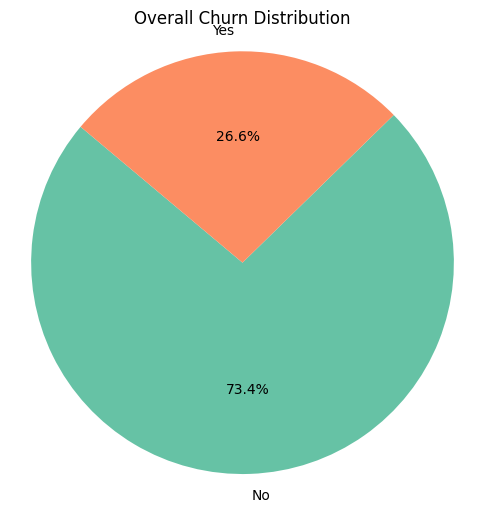

In [67]:
# Churn distribution pie chart
labels = churn_distribution.index
sizes = churn_distribution.values
colors =['#66c2a5', '#fc8d62']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Overall Churn Distribution')
plt.axis('equal')
plt.show()

Insights
- The Churn distribution chart shows the proportion of customers who have left the company. In this case, 26.6% of the customers have churned or stopped using the product. This should be a cause for concern for the company because the rate of 25% and above is significant and can cause huge loses.
- It is therefore prudent for the company to establish preemtive measures to contain the rate of Churn.

Calculating revenue loss
- We need to asses the revenue loss due to customers leaving the company.


In [68]:
lost_revenue = df[df['Churn'] == 'Yes']['TotalCharges'].sum()
print(lost_revenue)

2862926.9


Remaining Revenue Vs Lost Revenue Distribution
- We check the distribution of lost revenue vs the remaining revenue to assess the finacial impact of customer churn to the company.

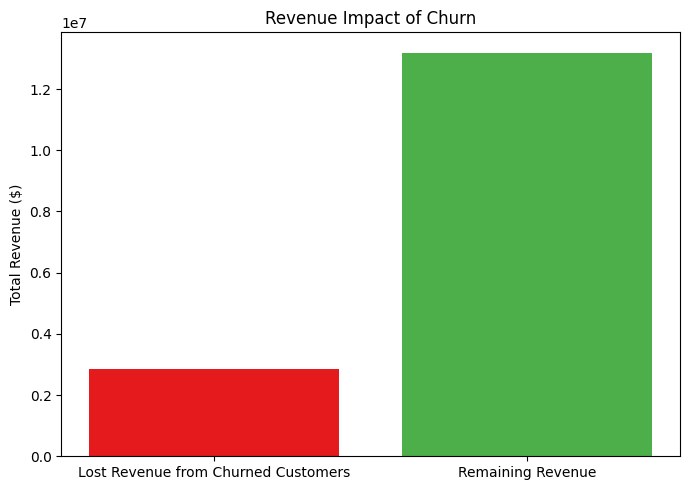

In [69]:
labels = ['Lost Revenue from Churned Customers', 'Remaining Revenue']
remaining_revenue = df[df['Churn'] == 'No']['TotalCharges'].sum()
values = [lost_revenue, remaining_revenue]

plt.figure(figsize=(7, 5))
plt.bar(labels, values, color=['#e41a1c', '#4daf4a'])
plt.title('Revenue Impact of Churn')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.show()

Next we calculate the average customer retention rate
- Retention rate enables us to gauge the company's performance with regards to containing customer churn

In [70]:
retention_rate = df["Churn"].value_counts(normalize=True)["No"] * 100
print(retention_rate)

73.42150170648463


Next we calculate the customer lifetime value(CLV)

Customer Lifetime Value enables us to estimate the average revenue per customer thereby enabling the company to manage the loss of value through churn
CLV = Average monthly charges * Average Tenure

In [71]:
avg_monthly_charge = df["MonthlyCharges"].mean()
avg_tenure = df["tenure"].mean()
clv = avg_monthly_charge * avg_tenure
print(clv)

2100.8736469702617


We therefore plot KPI to show the distribution of the retention rate and the clv.
- This enables tracking of the customer success and plan more on the retaintion strategies.

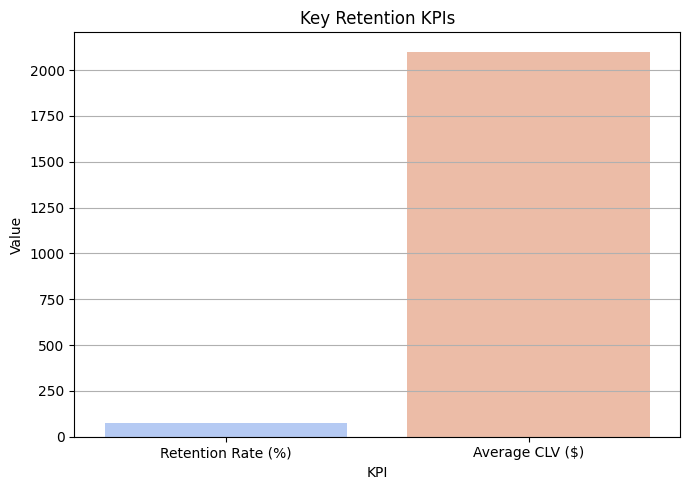

In [72]:
kpi_df = pd.DataFrame({
    "KPI" : ["Retention Rate (%)","Average CLV ($)"],
    "Value" : [retention_rate ,clv ]
})


plt.figure(figsize=(7, 5))
sns.barplot(x='KPI', y='Value', data=kpi_df, palette='coolwarm')
plt.title('Key Retention KPIs')
plt.ylabel('Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

correlation Matrix

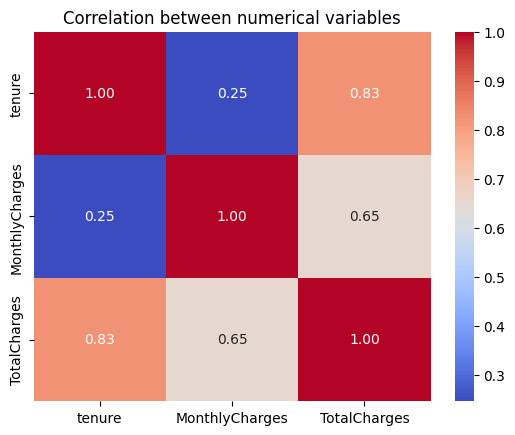

In [73]:
# Correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between numerical variables")
plt.show()

Insights
- There is a stronger correlation between the total charges and the tenure as compared to tenure and the monthly charges, implying that the longer the tenure the higher the charges.

Text(0.5, 1.0, 'Tenure vs Churn')

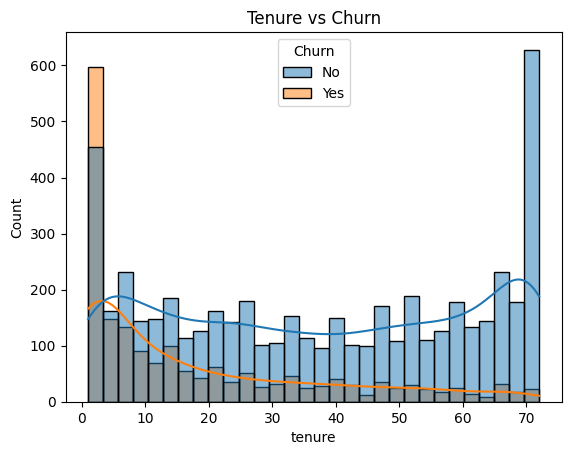

In [74]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Tenure vs Churn")

Text(0.5, 1.0, 'Monthly Charges vs Churn')

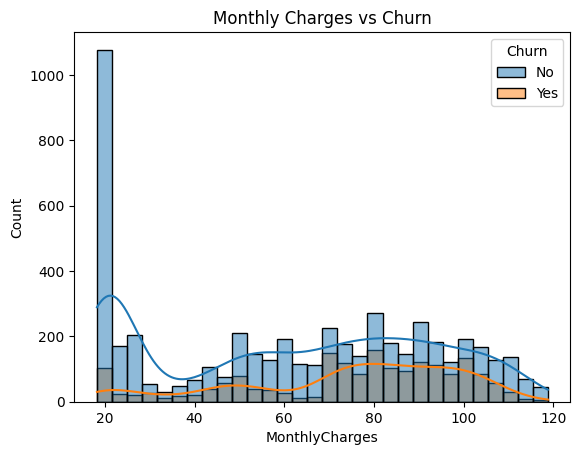

In [75]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title("Monthly Charges vs Churn")
#

Text(0.5, 1.0, 'Total Charges vs Churn')

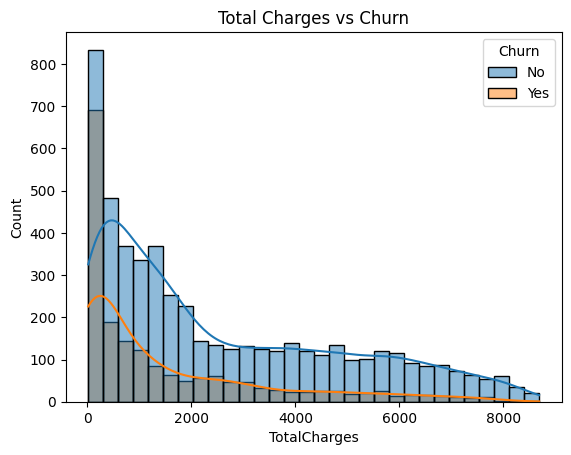

In [76]:
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=30, kde=True)
plt.title("Total Charges vs Churn")
#

Text(0.5, 1.0, 'Churn vs Tenure')

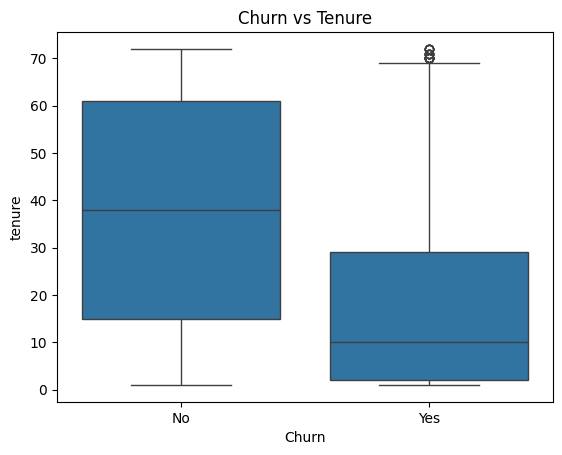

In [77]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Churn vs Tenure")

Text(0.5, 1.0, 'Churn vs Monthly Charges')

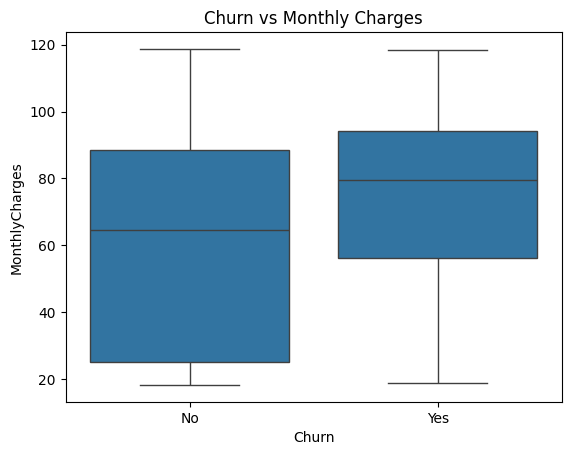

In [78]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Churn vs Monthly Charges")
#

Text(0.5, 1.0, 'Churn vs Total Charges')

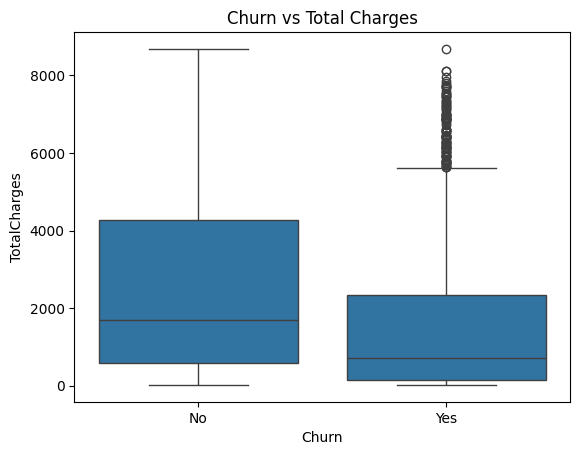

In [79]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title("Churn vs Total Charges")
#

Outlier Observations:

-tenure:
 >No extreme outliers; the distribution is spread out but within range.
>Tenure is in months — values range from 0 to 72.

-MonthlyCharges:
 >A few high-end outliers (customers with high monthly bills).
 >Still reasonable — may reflect valid premium users.

-TotalCharges:
>Several high outliers in total charges — again, likely valid long-term or high-paying customers.



Relationship with categorical data

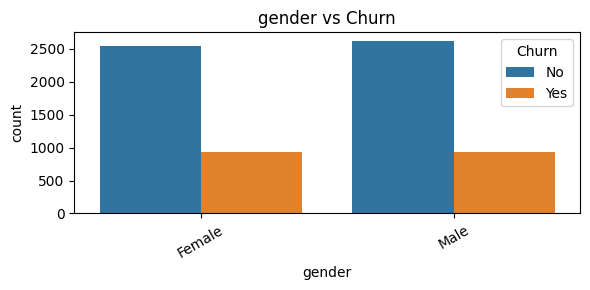

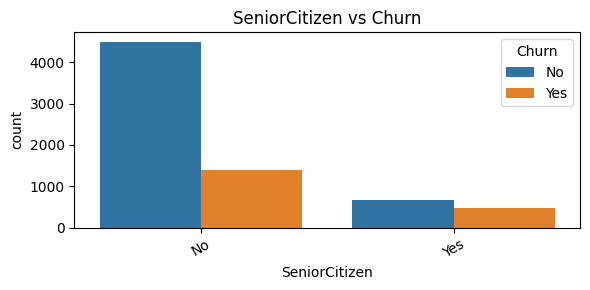

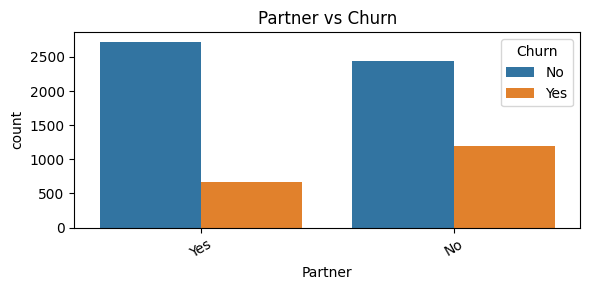

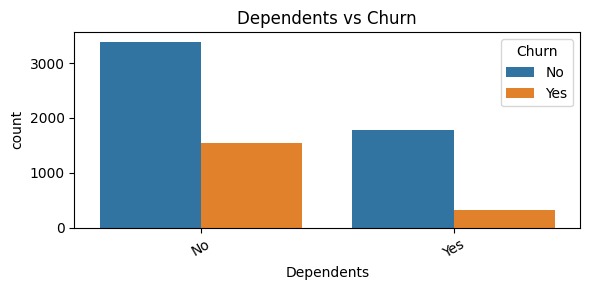

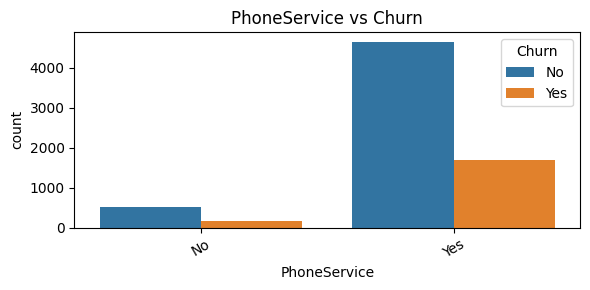

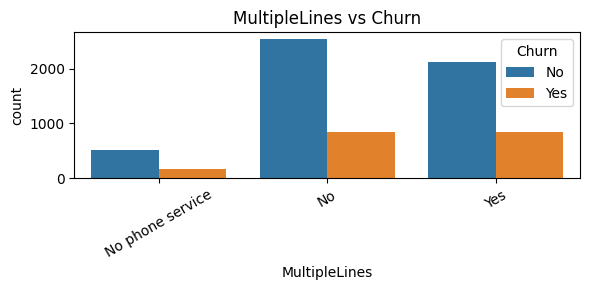

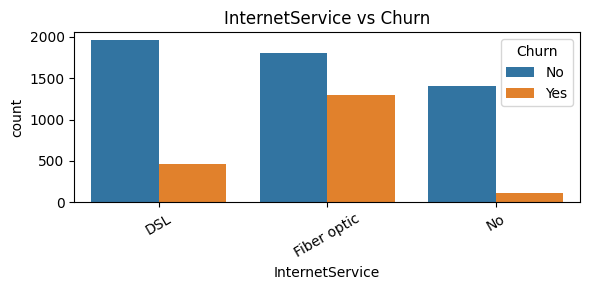

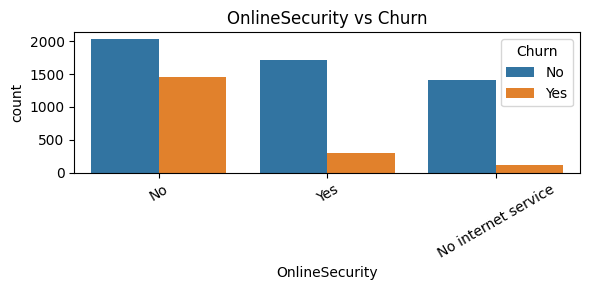

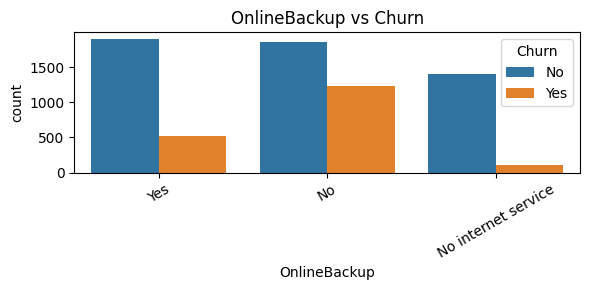

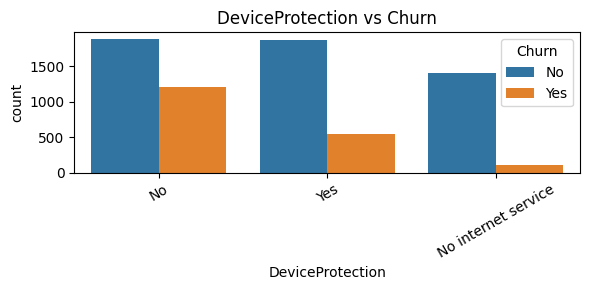

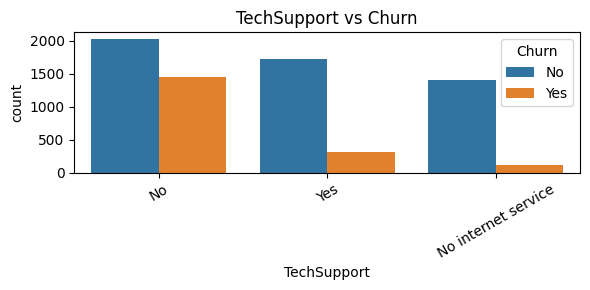

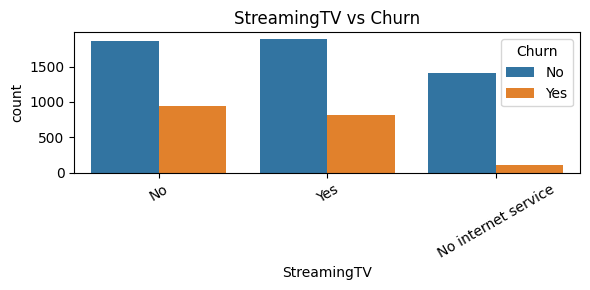

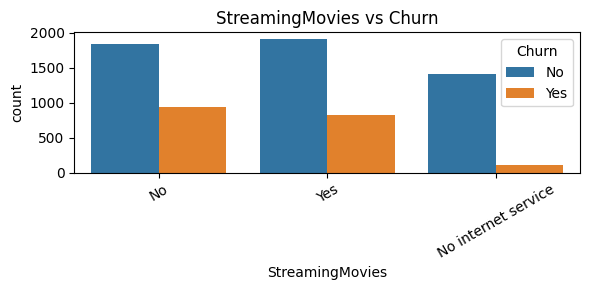

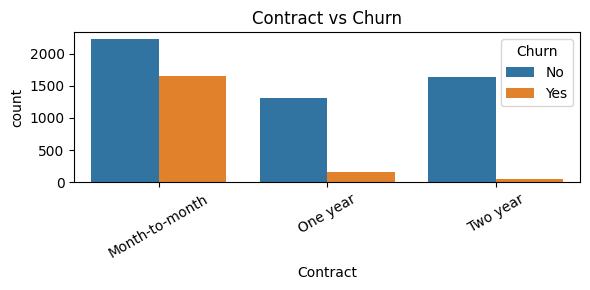

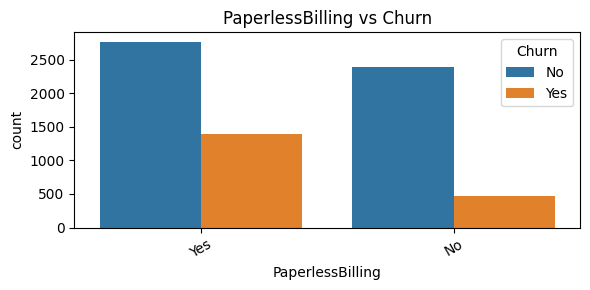

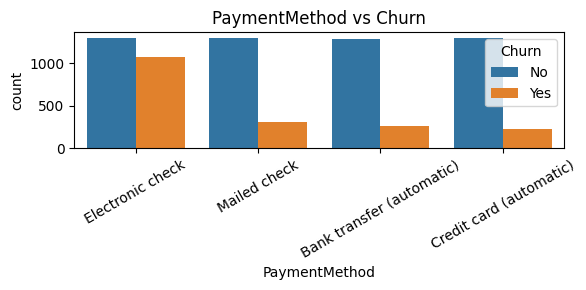

In [80]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

2. Outlier Treatment Of Numerical Data using Winsorization

Winsorize Monthly Charges and Total charges at 1st and 99th percentiles to reduce skew.


In [81]:
df['MonthlyCharges'] = winsorize(df['MonthlyCharges'], limits=[0.01, 0.01])
df['TotalCharges'] = winsorize(df['TotalCharges'], limits=[0.01, 0.01])

2. Encode categorical Variables

Preprocessing And Model Building

Encode the target column as binary

In [82]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [83]:

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')

cat_cols


#

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'LongTermCustomers']

In [84]:
label_encoder = LabelEncoder()
for col in cat_cols:
     if df[col].dtype == "object":
        df[col] = label_encoder.fit_transform(df[col])

In [85]:
print("\nAfter encoding:")
print(df.head())


After encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1

Standardize Numerical Variables

In [86]:
scaler = StandardScaler()

In [87]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final cleaned data is now in df_encoded
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,LongTermCustomers
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.162341,-0.996008,0,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260719,-0.173131,0,1
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363856,-0.961361,1,0
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.748127,-0.194702,0,1
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196747,-0.942112,1,0


Training And Testing The Model
1. Splitting Dataset

In [88]:
x= df.drop('Churn', axis=1)
y= df['Churn']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
x_test.shape

(1407, 20)

In [91]:
x_train.shape

(5625, 20)

In [92]:
y_train.shape

(5625,)

We apply SMOTE- Synthetic Minority Oversampling Technique to address the excessive imbalance between churn and non churn customers.

In [93]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)



Training Model Classifiers

In [94]:
 #Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_bal, y_train_bal)
y_pred_logreg = logreg.predict(x_test)


In [95]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(x_test)

Evaluating Models

In [96]:
# Logistic Regression Metrics
print("📌 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))



📌 Logistic Regression Results
Accuracy: 0.738450604122246
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [97]:
 #Random Forest Metrics
print("\n📌 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📌 Random Forest Results
Accuracy: 0.7633262260127932
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1033
           1       0.55      0.61      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.76      0.77      1407



Interpretation:

-Both models perform almost identically on this dataset.

-Precision and recall are well balanced, suggesting good overall classification.

Cross Validation

In [98]:
#Logistic Regression
scores= cross_val_score(logreg, x, y, cv=5)
print(f"Validation score for Logistic regression: {scores}")
print(f"Mean score for Logistic regression: {scores.mean()}")
#Random Forest
scores= cross_val_score(rf, x, y, cv=5)
print(f"Validation score for Random Forest: {scores}")
print(f"Mean score for Random Forest: {scores.mean()}")

Validation score for Logistic regression: [0.80383795 0.80881308 0.79089616 0.81365576 0.8029872 ]
Mean score for Logistic regression: 0.8040380297253824
Validation score for Random Forest: [0.79317697 0.79317697 0.77382646 0.79800853 0.79658606]
Mean score for Random Forest: 0.7909549994388957


In the cross validation, the model performs best in the logistic regression model

Feature Importance Using Random Forest

In [99]:
model = RandomForestClassifier()
model.fit(X_train_bal, y_train_bal)

importances = pd.Series(model.feature_importances_, index=x.columns)
print(importances.sort_values(ascending=False))


MonthlyCharges       0.153668
TotalCharges         0.140921
tenure               0.134461
Contract             0.119729
OnlineSecurity       0.077590
PaymentMethod        0.049639
TechSupport          0.047965
LongTermCustomers    0.037281
OnlineBackup         0.026692
InternetService      0.025762
Dependents           0.024599
gender               0.024541
Partner              0.021351
PaperlessBilling     0.021247
DeviceProtection     0.019940
MultipleLines        0.019654
StreamingMovies      0.017301
StreamingTV          0.016229
SeniorCitizen        0.015498
PhoneService         0.005931
dtype: float64


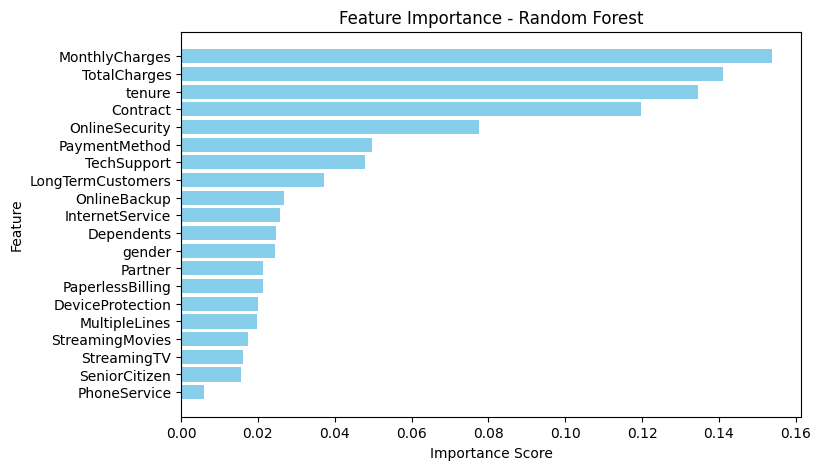

In [100]:
importances = model.feature_importances_
feature_names = x.columns

feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
# 5️⃣ Plot the feature importances
plt.figure(figsize=(8, 5))
plt.barh(feat_importances["Feature"], feat_importances["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

Feature Importance Analysis

>Understanding which features influence customer churn the most is critical for any successful predictive model — and even more so in a high-stakes domain like telecom, where customer retention directly affects revenue. In this section, we break down the relative importance of key features in our model, based on a trained RandomForestClassifier.

1. Total Charges- Higher Charges resulted to significant rise in churn. This could be due to higher churn rates among top tier clients.
2. Monthy Charges- Higher Monthly Charges resulted to higher churn rates, customers with more bills were likely to churn more.
3. Tenure- Newer customers were more likely to churn than older customers.
4. Contract - Customers with shorter term contracts had higher churn rates than customers with longer term contracts.
5. Internet Service_Fiber_Optic - Type of Internet service matters as most customers who used fiber optic were more likely to churn.
6. Online Security- Many clients value online security, the company should prioritize online security to minimize churn
7. Tech Support - Dissatisfactory tech support contributed to more churn
8. Payment Method_Electonic Check- Most of the customers who used electronic check were more likely to churn as compared to other payment methods.

Saving the Model

In [101]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

In [105]:
# Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [106]:
model.fit(X_train_bal, y_train_bal)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'LongTermCustomers']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [107]:
import pickle

with open('Trained Logistic Regression Model.pkl', 'wb') as f:
  pickle.dump(model, f)

#with open('Trained Random Forest Model.pkl', 'wb') as f:
 # pickle.dump(model, f)

df.to_csv('Pre Processed Churn Dataset', index=False)